In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [2]:
df01 = pd.read_csv("final_db_price.csv")

C:\Users\Bravin\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df01.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'sensor1', 'sensor2', 'sensor3',
       'sensor4', 'sensor5', 'sensor6', 'temperature', 'time_stamp',
       'Leaf_tasterInput', 'Infusion_tasterInput', 'Liquor_tasterInput',
       'broker', 'week_no', 'lot_no', 'estate', 'grade', 'net_weight',
       'auction', 'price', 'bagWeight', 'company', 'updated', 'cleaned_grades',
       'cleaned_estate', 'DistrictRegion'],
      dtype='object')

In [4]:
df01.shape

(746499, 27)

In [5]:
#grouping the data 
#get the aggrigated mean of 200 sensor readings 
df01 = df01.groupby(['DistrictRegion',"cleaned_estate","cleaned_grades","lot_no",'net_weight','bagWeight','price']).agg({"sensor1": "mean", "sensor2": "mean", "sensor3": "mean", "sensor4": "mean", "sensor5": "mean", "sensor6": "mean"})
df02 = df01.reset_index()
df02

,DistrictRegion,cleaned_estate,cleaned_grades,lot_no,net_weight,bagWeight,price,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6
0,Low,ACU SUPER,BOPA,1069,32.0,10,320.0,460.11990,141.93025,91.40770,53.78795,39.16390,23.28365
1,Low,ACU SUPER,FBOP,1065,32.0,10,320.0,477.51365,145.18380,74.55020,44.52600,36.62670,22.47490
2,Low,ACU SUPER,FBOP1,1066,32.0,10,320.0,589.99970,178.79560,96.53980,58.22385,45.96070,28.70130
3,Low,ACU SUPER,FBOPF1,1067,36.0,10,360.0,380.19700,120.39940,66.32515,39.55315,30.65545,19.38830
4,Low,ACU SUPER,FBOPF1,1068,36.0,10,360.0,478.96080,147.42370,86.30010,52.71205,40.09470,24.23630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,high,UPPER GLOUCESTER,FBOPF1,45,45.0,20,900.0,523.37580,169.06045,116.08840,73.93190,46.11795,25.79845
3252,high,UPPER GLOUCESTER,OP,38,30.0,20,600.0,803.37125,224.86970,135.03095,84.92525,61.76075,34.71545
3253,high,UPPER GLOUCESTER,OPA,39,22.0,40,880.0,335.51725,165.13965,226.21105,293.21850,365.04720,446.74595
3254,high,WOOTTON,BOPF,6,58.0,20,1160.0,764.44480,253.41825,207.92540,130.06420,76.57970,42.08930


In [6]:
#get the subset with only required data (sensor readings and price)
price_sensor = df02[['cleaned_grades','bagWeight','net_weight','DistrictRegion','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','price']]
#price_sensor = price_sensor.reset_index()
price_sensor

,cleaned_grades,bagWeight,net_weight,DistrictRegion,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,price
0,BOPA,10,32.0,Low,460.11990,141.93025,91.40770,53.78795,39.16390,23.28365,320.0
1,FBOP,10,32.0,Low,477.51365,145.18380,74.55020,44.52600,36.62670,22.47490,320.0
2,FBOP1,10,32.0,Low,589.99970,178.79560,96.53980,58.22385,45.96070,28.70130,320.0
3,FBOPF1,10,36.0,Low,380.19700,120.39940,66.32515,39.55315,30.65545,19.38830,360.0
4,FBOPF1,10,36.0,Low,478.96080,147.42370,86.30010,52.71205,40.09470,24.23630,360.0
...,...,...,...,...,...,...,...,...,...,...,...
3251,FBOPF1,20,45.0,high,523.37580,169.06045,116.08840,73.93190,46.11795,25.79845,900.0
3252,OP,20,30.0,high,803.37125,224.86970,135.03095,84.92525,61.76075,34.71545,600.0
3253,OPA,40,22.0,high,335.51725,165.13965,226.21105,293.21850,365.04720,446.74595,880.0
3254,BOPF,20,58.0,high,764.44480,253.41825,207.92540,130.06420,76.57970,42.08930,1160.0


In [7]:
#define predictor and response variables
X = price_sensor[["sensor1", "sensor2", "sensor3", "sensor4", "sensor5","sensor6"]]
y = price_sensor[["price"]]

In [8]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [9]:
mse = []
n = len(X)

In [10]:
# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1), np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

C:\Users\Bravin\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:83: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
C:\Users\Bravin\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:291: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
C:\Users\Bravin\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
C:\Users\Bravin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:1386: RuntimeWarning: invalid value encountered in greater
  rank = np.sum(s > cond * np.max(s))
C:\Users\Bravin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (

In [11]:
# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5,1,'price')

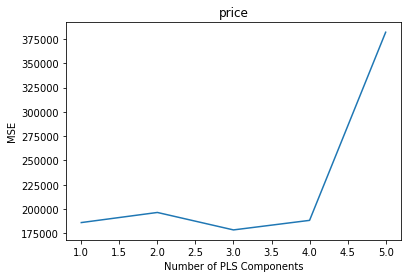

In [12]:
#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('price')

In [13]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

397.7174970303646

In [14]:
#pls.score(X_test, y_test)
# r-squared value for the model
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PLS r-squared -1647.526


In [15]:
# adjusted r- squared value should increase with addition of new indipendent variables 
# if there is no increase or decrease we shouldnt consider adding that indipendent variable
print(f"PLS adjusted r-squared {1 - (1-pls.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1):.3f}")

PLS adjusted r-squared -1574.554
